# **Modelos de clasificación**

In [ ]:
# Importamos las librerías que estaremos utilizando

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Cargamos el dataset de Iris

from sklearn.datasets import load_iris
iris = load_iris()
iris

Si imprimen la variable "iris", podrán observar que no tiene una estructura de DataFrame. Para ello, debemos convertirla con la libería Pandas.

In [ ]:
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


*Ahora tenemos nuestro dataset Iris expresado en una estructura DataFrame de Pandas.*

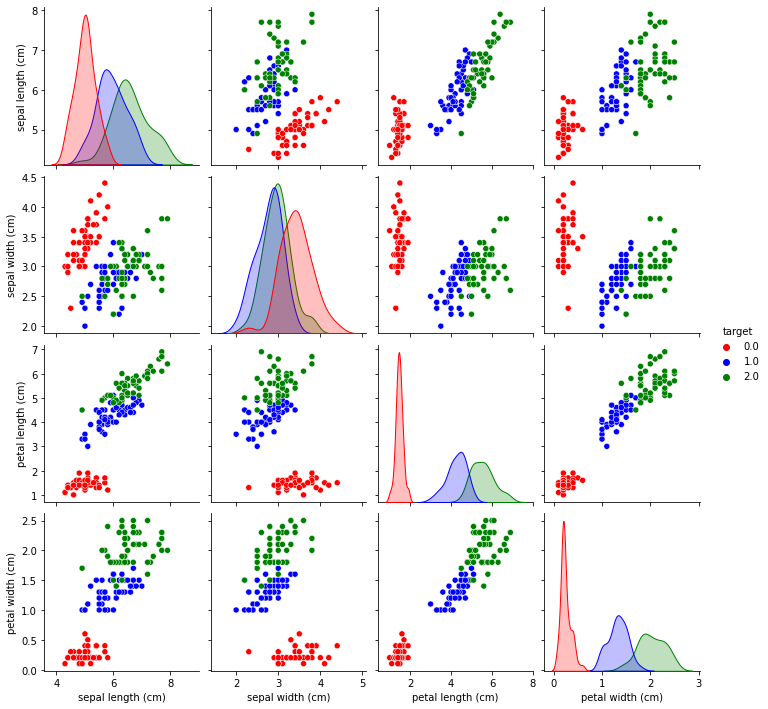

In [ ]:
sns.pairplot(data, hue="target", palette = ['r', 'b', 'g'])
plt.show()

In [ ]:
def plot_corre_heatmap(corr):
    '''
    Definimos una función para ayudarnos a graficar un heatmap de correlación
    '''
    plt.figure(figsize=(12,10))
    sns.heatmap(corr, cbar = True,  square = False, annot=True, fmt= '.2f'
                ,annot_kws={'size': 15},cmap= 'coolwarm')
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 45)
    # Arreglamos un pequeño problema de visualización
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()

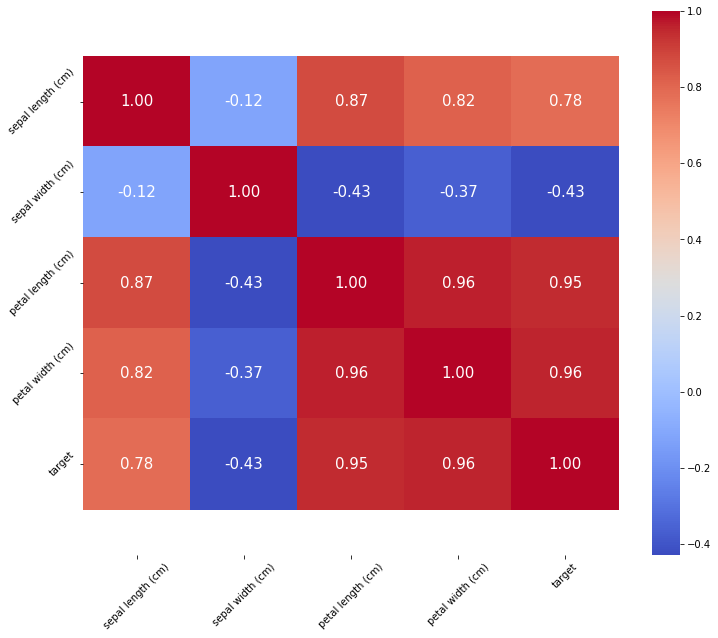

In [ ]:
corr = data.corr()
plot_corre_heatmap(corr)

In [ ]:
X = data[['petal width (cm)', 'sepal width (cm)']]  # Denotamos X con mayúscula ya que 
                                                     # incluye más de un atributo
y = data.target # Etiqueta a predecir

In [ ]:
X.head()

,petal width (cm),sepal width (cm)
0,0.2,3.5
1,0.2,3.0
2,0.2,3.2
3,0.2,3.1
4,0.2,3.6


In [ ]:
y.tail()

145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: target, dtype: float64

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Instanciamos un objeto de la clase DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth = 6, random_state = 42) 

In [ ]:
from sklearn.model_selection import train_test_split

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, test_size = 0.25, random_state=0)
X_Train

,petal width (cm),sepal width (cm)
61,1.5,3.0
92,1.2,2.6
112,2.1,3.0
2,0.2,3.2
141,2.3,3.1
...,...,...
9,0.1,3.1
103,1.8,2.9
67,1.0,2.7
117,2.2,3.8


In [ ]:
# Entrenamos el modelo

clf.fit(X_Train.values,Y_Train.values)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
# Exploramos algunas de las características del modelo entrenado. Para pensar, 
# ¿qúe representa cada uno de estos valores?

print(clf.classes_)
print(clf.n_classes_)
print(clf.max_features_)
print(clf.feature_importances_)

[0. 1. 2.]
3
2
[1. 0.]


In [ ]:
# Predecimos

y_pred = clf.predict(X_Test.values)

In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(Y_Test,y_pred))

0.9736842105263158


Observemos, en esta etapa, las fronteras de clasificación que estableció nuestro modelo.

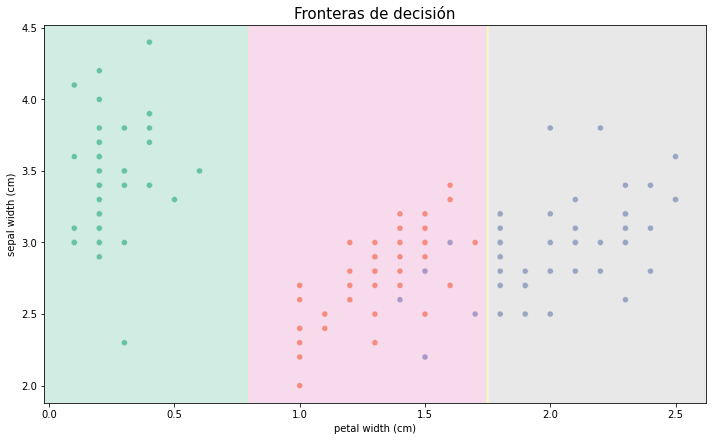

In [ ]:
plt.figure(figsize= (10,6))


ax = sns.scatterplot(x = X.iloc[:,0], y = X.iloc[:,1], hue= y, palette='Set2')
plt.legend().remove()


xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                      np.linspace(*ylim, num=200))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

contours = ax.contourf(xx, yy, Z, alpha=0.3, cmap = 'Set2')
plt.tight_layout()
plt.title('Fronteras de decisión', fontsize= 15)
plt.show()

### Visualizamos el árbol de decisión

In [ ]:
from sklearn import tree

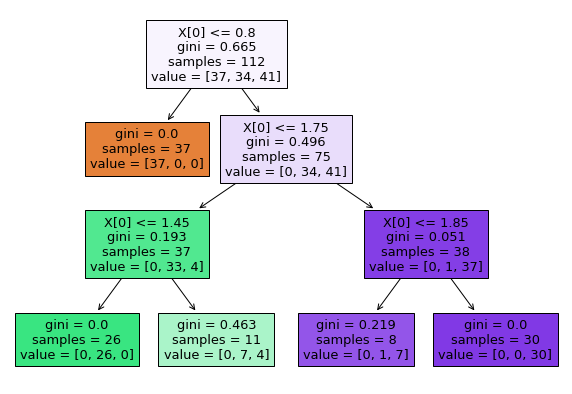

In [ ]:
plt.figure(figsize = (10,7))
tree.plot_tree(clf, filled = True)
plt.show()

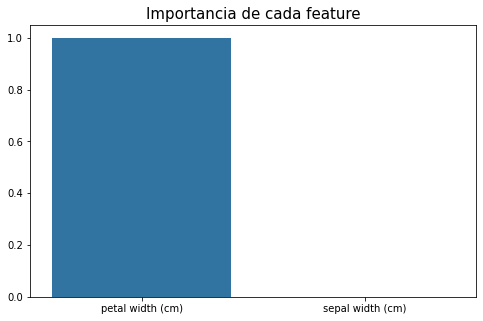

In [ ]:
# Ploteamos la importancia de los atributos elegidos a la hora de hacer la predicción


plt.figure(figsize = (8,5))

importances = clf.feature_importances_
columns = X.columns
sns.barplot(x = columns, y = importances)
plt.title('Importancia de cada feature', fontsize = 15)
plt.show()

## **2. Vecinos más cercanos**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Instanciamos un objeto de la clase KNeighborsClassifier
clf = KNeighborsClassifier() #No optizamos hiperparámetro aún

In [ ]:
# Entrenamos
clf.fit(X_Train.values,Y_Train.values)

KNeighborsClassifier()

In [ ]:
# Predecimos
y_pred = clf.predict(X_Test.values)

In [ ]:
# Evaluamos
print(accuracy_score(Y_Test,y_pred))

0.9473684210526315


Observermos, en esta etapa, las fronteras de clasificación que fijó nuestro modelo.

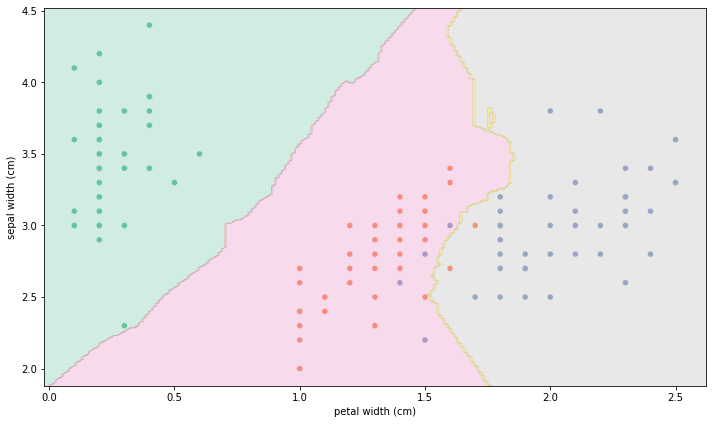

In [ ]:
plt.figure(figsize= (10,6))
ax = sns.scatterplot(x = X.iloc[:,0], y = X.iloc[:,1], hue=y, palette='Set2')
plt.legend().remove()

xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                      np.linspace(*ylim, num=200))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

contours = ax.contourf(xx, yy, Z, alpha=0.3, cmap = 'Set2')
plt.tight_layout()
# plt.savefig('arbol_iris.png', dpi = 400)
plt.show()